In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import requests
import time
import os
import urllib.request
from datetime import datetime

In [2]:
url = 'https://www.google.co.kr/imghp?hl=ko&ogbl'
search = '강아지'
scroll_cnt = 10

driver = webdriver.Chrome('./chromedriver.exe')
driver.get(url)
time.sleep(2)

# 검색
elem = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
elem.click()
elem.send_keys(search)
elem.send_keys(Keys.ENTER)
time.sleep(2)

# 스크롤
for i in range(scroll_cnt):
    if i == 5:
        driver.find_element(By.XPATH, '//*[@id="islmp"]/div/div/div/div[1]/div[2]/div[2]/input').click()
        time.sleep(2)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        time.sleep(2)
    else:   
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        time.sleep(2)
        
html = driver.page_source
time.sleep(2)

driver.close()
driver.quit()

C:\Users\user\AppData\Local\Temp\ipykernel_5140\2594236466.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


'<html lang="ko" dir="ltr" itemscope="" itemtype="http://schema.org/SearchResultsPage"><head><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.t9z7VPsEMFg.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8oD_5FQW3kT3ksWwmXIWvhhqbKdw/cb=gapi.loaded_0" nonce="" async=""></script><base href="https://www.google.co.kr/"><meta name="referrer" content="origin"><script data-id="_gd" nonce="">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/cameos","/cameos/*","/cbk","/cbk/*","/coronavirus-map","/coronavirus-map/*","/covid19-map","/covid19-map/*","/discover/likes","/discover/likes/*","/display-ads-user-messaging-embed","/display-ads-user-messaging-embed/*","/finance","/finance/*","/history","/history/*","/local/business","/local/business/*","/local/cars/tools","/local/cars/tools/*","/local/follow","/local/follow/*","/local/imagery/report","/local/imagery/report/*","/local/place/qa","/local/place/qa/*","/local/realestate","/local/realestate/*","/l
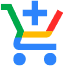
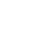
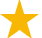
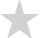
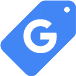
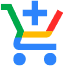
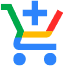
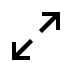
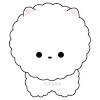
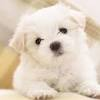
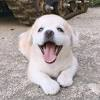
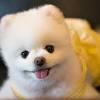
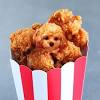
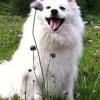
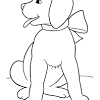
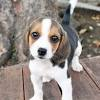
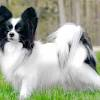
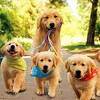
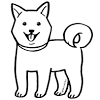
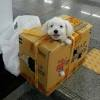
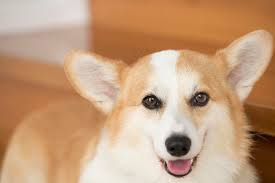
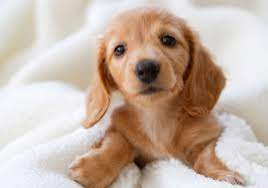
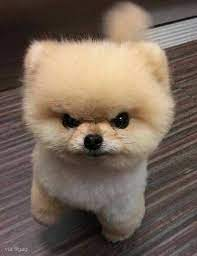
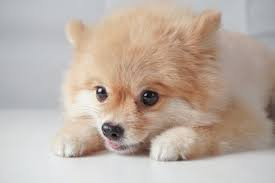
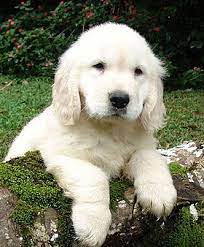
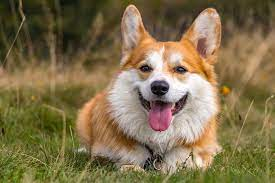
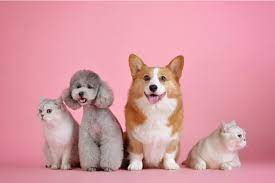
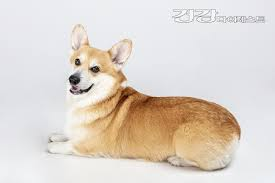
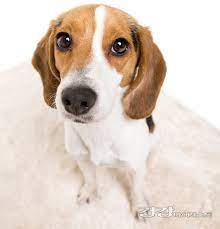
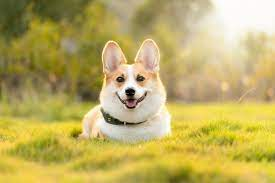
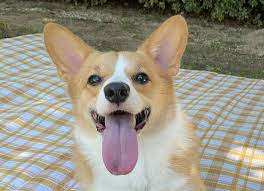
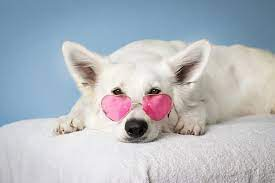
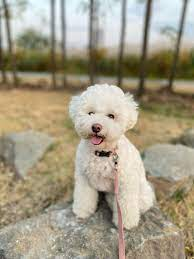
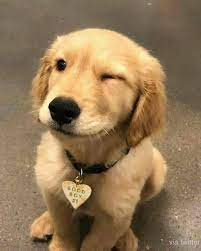
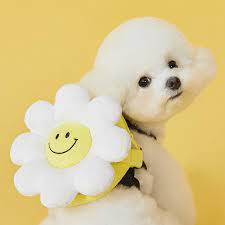
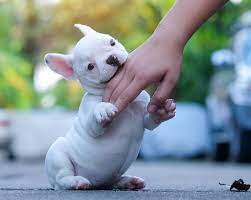
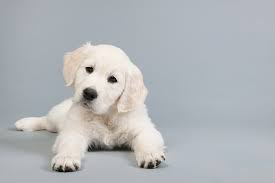
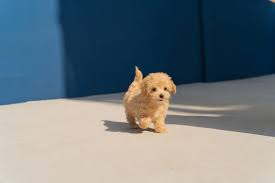
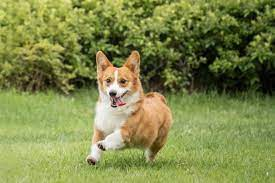
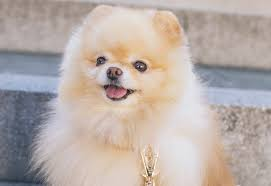

In [3]:
html

In [4]:
soup = bs(html, 'html.parser')

In [26]:
img_tags = soup.select('div#islrg div.islrc div img')

''
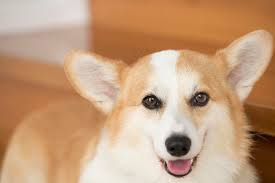

In [14]:
img_tags[0]['src']

In [7]:
os.makedirs(f'./{search}/', exist_ok=True)

In [23]:
today = datetime.today()
date = str(today.year) + str(today.month) + str(today.day) + str(today.hour) + str(today.minute)

In [28]:
for idx,img_tag in enumerate(img_tags,1):
    try:
        # print(img_tag['src'])
        urllib.request.urlretrieve(img_tag['src'], f'./{search}/{search}{str(idx)}_google_{date}.jpg')
    except:
        pass

In [28]:
print(datetime.today())

2022-08-11 10:43:31.047863


In [29]:
print(type(datetime.today()))

<class 'datetime.datetime'>


In [30]:
print(datetime.today().year)

2022


In [31]:
print(type(datetime.today().year))

<class 'int'>


In [32]:
today = datetime.today()
date = str(today.year) + str(today.month) + str(today.day) + str(today.hour) + str(today.minute)
print(date)

20228111058


In [10]:
tmp = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEBUQEBIVEhAPFQ8PEBAQFRAPFQ8PFRUWFhUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGhAQGi0dHR0tKy0tLS0rLS0tKystLS0tKystLSstLS0tLS0tLS0rLS0tLS0tLSstLS0tLS0rLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAECBAUGBwj/xAA2EAACAQMCBAQEBQQCAwEAAAAAAQIDBBESIQUxQVEGE2FxIoGR8BShscHRMlLh8SNiM0KCB//EABkBAAIDAQAAAAAAAAAAAAAAAAECAAMEBf/EACERAAICAwEAAwEBAQAAAAAAAAABAhEDEiExEyJBBGFC/9oADAMBAAIRAxEAPwDvFEmojJk0IMJRJqIkSRCDqJNEUSQSUTTJqQJE0QNEhYJJD4IQzL+Gxyt1D4jsL2Oxyt+sSMf9K4bf5X0rpCwJMTZzzcNgZxFkTYLCRcBtBPI4LDQNQH0kxAsJDSRcAqESyFdwBTpFzA2CWSiiqRPQWtIziHYFFRwIuBbcCDgTYlFRwI6C3KBBwDsCis4EdJZcSDiGwUAaByDSiCkhkwNA8iHwIIKPS4k0A85D+edg49FlEkVfxAzuSWSi6h8me7oi7sFh1NPWiSqIyHdjfiwbB1NrzkM65jfiRvxDBuHQuXtfY5fiFbc0ruq8HO303kzZ3aNX88aYdVR9RnxqklWMNG0vahZKarklWFoJayPkrKqTVUWg2GyPkEpktQAk8j5IJjkISyLJEQCEhMjki2QhIZojkbUQgmiLQ7kNqCQi0QaCNj06Tk8RTb9NwoVlaSBSiaj4ZUxnTj3aKNWk4vDWB6a9QuyfhUcRBXERLJR0f4pklXYCKCI61nMpBVVY+tkETQLJQtySQ6JIgSKiOkTSJKIAEEPkdxIkCCunsc/fs3bnkc/flOXw0YSsmIGmLUYzXYQWQeofUCiE1IlrBah8goIZVWOq4FMchCwq5NXBVwLAKRC4rgl55QwNlg1CaSrD+YjM1sfzWDUlmnqQzRnquTjXJqSy40PToSk8RWSXDraVR5e0er7+iOosrNJJYxFdP5LIYnIqyZVEy7Hged5vPouXzNiFmorC2XZbBa9TSsLb82V/xDfc3wwxijDPNKTI16fb5mVeW6ccP/Rr5yAuKezFnEaEjjp7NrtsIJXXxP3Y5ha6bl4XqdcPCsY8JBY1GbllMfxmzGoFjIyKdZh43A3yoDxM00yaZnRuA8LgZTTEcGi9ELGJThXRapVUxk0K0yej/QVWed+nYVGWfmaUFhFKbmyx1FGNc8Nk1sjA4lwmaz+53fmpAqqjPZjSxNr0EM1Pw8vq0JR/qTX6Ajvr3hKaaW5jXHANs4x7djI4NemuOSLOaEa0+DtdfXfbYoXlo4Puu6Foeyux/tjU4OTwlk6HhfB1hOa357kojdGPa2VSo/gi3n5L6s6Ww8FVJLNSpGGeiWp/wbHDrbdJbfsdNSjsasGCMlcjHn/olHkTnrbwZbxS1a5vq28Z+SD1fC1s1/48bc03sbrByka/igvxGT5sj/6ZxnEeB0aXKOfd9jPrcNpvbGPbJu30lKb6/sZ1am09vY500tnXh0ISlStmRV4P/a38ylW4dOPOP0OlpzxgJNprf+OYmiH+Ro49UJN4xzN23tacNnHU9vbsWadCOdiVal8O3T8xUqGcrL9rFPdLb06FyvU0x7GfwussY6hb/DW316GvH5Zjye0U53Dbwm/r+wanF8+fvsU4LfZbd0WacN+T9y9FbRapPca9liD9glOGP8mT4ku9FNrO72RXkfB8atnIXF38cvdiKeBjEbjZiFiinGYaFQtaERaSJoDCoFjMQYIiSZGLJpAshJVGFp3DQDAgqTQHFM6Own/j2NRy2OZ4dV5emz9uh0FJ55Muwyp0Z80R9b+9gMpv39Fuw+H9ojNevv0NZmHt2+rftsGqUu2CrCO/Pf8AYvLlz+uEK1YfDA4pTXb/AAZlG0U+ey/VG7xT+lrCKtjDKSXU5+RVI3Y39QNjwaMXqXLojWjRS6b/AKBlDGOom8/4LEiuUmyMI4fubFpJ4KFrTyaVKODVh4ZcobAKtDZ+zDITjk0sznPO13bXdgatot18/bb7/I3PJWfvfJGpQ+/0MvxI0/Kzla1vjdrnuV5P/SOlvaSwzl7qaUtvmZ5x1NEJbEnLoKrPK/IFq2yunTcn0/0Vvo64CoVNGXtjuyNW6lUlz+Hs9ildSlJ6VyW77stWrwvi3++5pxx4Vy9NG3jhLH5F2lFc9slW3WV2Ro06G2+y+heZ36QqySWp/LJwnH77zKjWfhj+p0HiPimF5ceb69jjpwMWWdujZhhSsHkQvLEVF5dUSWkdImkWWLRBE1Nj6R9ILDRKNYNCuA0j6AWiUXFWJeailgW4CUaNGrh5+vsdFwy5TWPo+5xymy7w+/0PEs47/wBrCnTFnG0dxzBzj2IWFdSSz1Lk4bbbm2EtkYJrVmdVptrn+pV86UObyvXLL84vpH6lCvPO0lpwM0NHoSMVNZWF9+pOxpYZWt6Kb/PboadGOE+5myQVplsZOmhqk9wNSp8l0G1bv1HpU03vyXPJXdj1RfsZfaL0aq5dTnL3xLb26alJZSy1nLXTpuvmWOEcVpV/+SjUU4vqmm0+qf5fU241SMeTrOhhUCpmfr+/0LlF7FyZTRGbw2RbB1p4bK1zdxjHU3y/gS+j1wq3VwpScFz5v0XqYl5Zt7r6dzA4x4sVOqqdCEq1SrvphluWVhRjj23MKj46qOX/AC0ZU4p6W+ai/V+5RlxuXUi/FJR9Z19Jbe3NE6bSl6fPmDs7nzEqkX/Us57olXfVGQ1MjWpYba/kexpapZfJdO7BwrJvDL3C8KWO/cvxT/CqcWjUp1IR55z6Jv8AQocf4k4Q2TTey2NStJRWTiOPX/m1ML+mOy9R806iJhhtIzKs3J5by33BSJyBswnQICEIIC+iaQNMmmOwEh0MicRQjpEsE4U2FjSAECqRJUSxkQRbAKkKVILIiEWw9ndTp/0vb+18joeH8WyuueqOXQSnVcGmun5jRk0JKKZ2zustLRLfk9sfqQubXWt17Gbw3iylhPH8GvO6Wk1RyJoyPG4szKUdDfp8gsLjKZTnWby4lqxt218RmlNylw0RioxtkdWOf5Gd4p4jKhaznT/8mMQ21Yb/APbHpzN9cPi+7+bRO54RTlCUZx1Kaw877P1ZZjxu7K5zVUfPtK2py11bhyuKsoVWpyk8KvlaVhbpL4tvVbBeF8TqWlbzaMXTjNap0IylNRhsub35y2b7nWcZ8AVaVRztmpwbbUJNxaX749dzJfg2v5ilP4de0knKWy7s2qSMrR6L4Z8Q/iacG+csemWlvj6/mdtSe3yOG8E8EdJKLedO7wlz+0drKWCQd9BNVwq3s+ffkedeMOMVKUJU47vdJ45J9TvLt7s5bxJw9VY/EumM9cdslEnUrLoK1R5Uq+G023Krl1JLKlTlHlhrfDT6dUglOstEqdNupUrSju8vHxZbeebZ11PwjSe80/i32bz6/P8Ak2eD+GLejJTinOa5OTbw/TsWPLECxsJwrg1SlRhCLz8Kcll7S9GXPwj6m/awwt+ZKtRRneK+lqy1w466p6JKXyfLDLCrYakWeNUMLK/wzKpttbmdrVl8WpILxrjTxoi8ZOdbYHxFP4k8vtgyad5JdWNJ7ehj9eI29YzmZ0eIy9GOuIrrH6Caj7F3Uhit+Lh6iJQdjXRJA1IJFksKCRWS7QoD2dr1ZclHAANg4pEJkpDEABaJRRJoUSEHSGlEmIhAaB1mGwDlEJCNvLG6Nm0uJSW/sjOoW5tW9HThYJ2hXROnS3S+2a9vEz09zWtI/aLMUelWWXC5RgFlEaOw+o3LwxN9KNe2y+X74BVLOOHlLk19cfwjVSISph0BuVrC3UY+st2Suo4WS1FAa76FiVKhPWY83ko3NPZrBqu2xl5ATipISUE0PGTRk06GVhPdFy3teoDS4zx0ZoU8pZZmjDvS+UuB4xwiMuQNVRozLW6K6M7i9LMW/qYdCPNHT3CyjnriOJPBkyrtmrE+UYHiK2UovuuW37nFz2eD0W9tpTi9vzwcRxOylGW+Pk8gXg/6Uo1BaiEo4IMVhsNqY5XyxwUGzrIyL/DqLlIzaTydVwW3wsiodukW6dPCGcQ9SIygESypUpgJxNGVMrVKYo6ZWwPgk4ktASEEgtOn3IPYeCbIQI4kfKCwiXaNvhZYRW6B8Oobmv5BHhdDO5fq0djTGH0M0p/co0qOZGtRjhFe3p/aLegbFCui5J3wmpCBBKRan0pa4EVQnkr3ENshLeWYp9y5Mra4EqTwsnLca8TQozw2n3QTx7xiVvbaof1yahH0by8/RM8Ov7yrWk5OTk++RgHr0/GVOSaTS+fUu8I4hGovhee54HOVRLm8ddzd8Hcbq0a8EpNwnKMJRe/N4yB8CuntlWmspvoVOIXONMVzk8bdEW4zzEoVE3V9Ix/PJVIsgWoR2HTwKApIrkMiNRmJeL4vU2ZrbJlXayyjJ4XY/TKvqU9LcOZwHG7m4jJ64Q07/FqUX81k9JuqCcd3KPqv5PPPFvDXz1v0b3Ul/wDKJCvGNK/wyFxCKXx4Weu7T9tgtOvSnymvnsYWhx2Tyuq5p/IDOmuaWPTp8ix4oPwCnI6jyV/cvqI5dOXd/Vji/B/o256RwuGqaR6DZUNMUcf4Wtszyd1TRVFDTkBqxB4LU4AtArXQJg3Aq3EC+4lW5gCSHizOJqIOSwwqewiLGDmgsEDhHcsRIRh7WGWarpbYAcOt+r2NGNPVJJF+OFmfJIuWlLEVgJKGQkIYWBjdryjFt0enSwT0jRZNMiSA5ME6ROKJZGZKSJZGcdgVvPCw+jYaRn30nBa0s45rug3XQpXwyv8A9AsPOsqiW8oJ1Idd0v4bPnq4u6sZaNLUer5f7PpKhxanVi9Mk8bNdu+Tz3xZ4Mp1qjqUanlZ3lT5x1d12G2QNX4eUVK0lF4y327m/wCALV1rmGYvEHrn2WOT+uC7R8ILW1OvTS/6tN/RnaeHbS2tI+XSknObWqTacpvtt0A5cGUGdhCeEAt25Ny6N7cuRgQ4069w7aCklT3qS+FN7404fLfmdPShhFTdseqQToQaDKA0qYHGwJgZRyvUzK9Pc1ZRwVK66lU4lsGZV/JqO6XujzPxBVbm8za/64T+eUemcWuXGDzHJ5dxxQnUbitM1nVB7Z9YvqIl0sRizpeufyBOkHEGw0VfKEWsCDsSj17wxRxDJvqRS4TR000WkJVIF2yxBjtA6YdIK6K+AGivXRfcCldRwCS4NFmPXW4SjAaa3LlGGxQjQ2B0E6UdybjuFox3JQGzXsqeUa9vRSKvD6e2TRR0sUKVnOyytkWDkGaIOJaysGieshJEHLApA2R8leNQKmQgQFWp6k0+T2fNfoTTFIgUzy3i0XY3UJUk1Tq1ownFv4VTaal8sy1fIy+NWkvNaUpYe73fv+56P4h4NG4puPKaalCXaa5Z9Dz+64jKg/Kv6Uqc4/DGthypzXR6l1AlRtwzg21L9MR8NXzNnhi8hebjMotOPTMuiz03wQfFbTm6sPlIPa2871wjSUoW0GpTqtOPmY5Rhnd98+wWy2UscYunZreEbGScqtWP/LPefL+pvL5HXQj2AWtFJbFtRK4owzYhau46GkhxAc16FSvDsWJSx7FG6uE9uUly9RZDRMniXxJrv97o844/wuUZOXNb/I9Jlu9zH43apxb6e2Sii9SPL2hsFm/goyf5Y5FdMRosEIQgBPe7eGIJegktxxDsqQRFikxCDH0EickUruOwhEmuEh6ZWNy7SjsMIzI0NicdwttDM0hCDFfZAk+HT0NkHUhhHTRzn6TyMxCCAi0QlEQgEB4JCEQIykLXnZCEAg0lsVL6yhUjpnFSi1upJNPvsxCIwpmJHwnaRlqVCCfR9U+67M1oWySwkhCFoa2Ly8fwTiIRACaIOQhBIVq8u5jXCecdv0EIrkNEhpKHEH8L+/r3HEKOeb+IMam8Y9uRiKQhCyRbHwWscQhaGP/Z'

In [11]:
urllib.request.urlretrieve(tmp, f'./{search}/{search}777_google_{date}.jpg')

('./강아지/강아지777_google_20228111111.jpg',
 <email.message.Message at 0x1b561c368f0>)

In [12]:
len(div_tags)

3656

In [27]:
len(img_tags)

883

In [35]:
# 모듈화
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import requests
import time
import os
import urllib.request
from datetime import datetime

def google_img(search, scroll_cnt=1):
    url = 'https://www.google.co.kr/imghp?hl=ko&ogbl'

    driver = webdriver.Chrome('./chromedriver.exe')
    driver.get(url)
    time.sleep(2)

    # 검색
    elem = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
    elem.click()
    elem.send_keys(search)
    elem.send_keys(Keys.ENTER)
    time.sleep(2)

    # 스크롤
    for i in range(scroll_cnt):
        if i == 5:
            driver.find_element(By.XPATH, '//*[@id="islmp"]/div/div/div/div[1]/div[2]/div[2]/input').click()
            time.sleep(2)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
            time.sleep(2)
        else:   
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
            time.sleep(2)

    html = driver.page_source
    time.sleep(2)

    driver.close()
    driver.quit()
    
    # BeautifulSoup 전환 후 img 추출
    soup = bs(html, 'html.parser')
    img_tags = soup.select('div#islrg div.islrc div img')
    
    today = datetime.today()
    date = str(today.year) + str(today.month) + str(today.day) + str(today.hour) + str(today.minute)
    
    os.makedirs(f'./{search}{date}/', exist_ok=True)
    
    for idx,img_tag in enumerate(img_tags,1):
        try:
            # print(img_tag['src'])
            urllib.request.urlretrieve(img_tag['src'], f'./{search}{date}/{search}{str(idx)}_google_{date}.jpg')
        except:
            pass

In [37]:
google_img('강아지')

C:\Users\user\AppData\Local\Temp\ipykernel_5140\3393565137.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')
